**Name:** Omitted 

**Studednt ID:** Omitted

In [1]:
## Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

### Answer to the Question No: 01

#### (Movielense data)

In [2]:
## Reading the given 'users csv / dat' file

u_names = ['user_id', 'gender', 'age', 'occupation', 'zip']

df_users = pd.read_csv('users.dat', sep = '::', header = None, names = u_names)


## Reading the given 'ratings csv / dat' file

r_names = ['user_id', 'movie_id', 'rating', 'timestamp']

df_ratings = pd.read_csv('ratings.dat', sep = '::', header = None, names = r_names)


## Reading the given 'movies csv / dat' file

m_names = ['movie_id', 'title', 'genres']

df_movies = pd.read_csv('movies.dat', sep = '::', header = None, names = m_names)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


#### • Merge the three datasets (users, ratings, movies) the same way as it was done in the lecture example.

In [3]:
### Merging all the three datasets

## In order to avoid being repetitive we will merge the datasets in following way-

## First, we will merge 'df_ratings' and 'df_users' datasets 

df_r_u = pd.merge(df_ratings, df_users)
df_r_u.head(3)

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip
0,1,1193,5,978300760,F,1,10,48067
1,1,661,3,978302109,F,1,10,48067
2,1,914,3,978301968,F,1,10,48067


In [4]:
## And now with that merged dataset we will again merge 'df_movies' dataset

df = pd.merge(df_r_u, df_movies)
df.tail(3)

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western
1000208,5938,2909,4,957273353,M,25,1,35401,"Five Wives, Three Secretaries and Me (1998)",Documentary


#### • Filter the resulting dataframe to keep ratings only from users who have at least 100 ratings available

In [5]:
### Grouping by 'user_id' column

user_ratings = df.groupby('user_id').size() 

user_ratings.tail(3)

user_id
6038     20
6039    123
6040    341
dtype: int64

In [6]:
### Getting the user_id of users who has more than 100 ratings.

u_100 = user_ratings.index[user_ratings >= 100]   ## index list with user_id that belongs users with more than 100 ratings
u_100

Int64Index([   2,    5,    8,    9,   10,   11,   13,   15,   17,   18,
            ...
            6021, 6023, 6025, 6030, 6032, 6035, 6036, 6037, 6039, 6040],
           dtype='int64', name='user_id', length=2945)

In [7]:
### Filtering the DataFrame to have user_id of active users, who have (individually) at least 100 ratings.

new_df = df.loc[df['user_id'].isin(u_100)] ## This 'new_df' contains ratings only from the users who have at least 100 ratings
new_df.tail(3)

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western
1000208,5938,2909,4,957273353,M,25,1,35401,"Five Wives, Three Secretaries and Me (1998)",Documentary


#### • Filter the resulting dataframe to include information only on movies that have at least 200 ratings and that have genre ’Drama’ or ’Comedy.

In [8]:
### Grouping by 'title' column

ratingsBy_title = new_df.groupby('title').size()
ratingsBy_title.tail(3)

title
Zero Kelvin (Kjærlighetens kjøtere) (1995)      2
Zeus and Roxanne (1997)                        17
eXistenZ (1999)                               340
dtype: int64

In [9]:
### Getting the movies which have more than 200 ratings.

## Name(index list) of movies that have more than 200 ratings

t_200 = ratingsBy_title.index[ratingsBy_title >= 200]  
t_200

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1309)

In [10]:
### Filtering the DataFrame to have movies with (each) at least 200 ratings.

## This 'the_df' contains popular movies only with at least 200 ratings

the_df = new_df.loc[new_df['title'].isin(t_200)]  
the_df.shape

(696454, 10)

In [11]:
### Filtering the DataFrame to have movies of 'Drama' and 'Commedy' genres with (each) at least 200 ratings.

## This 'df_DC' contains popular movies of 'Drama' and 'Commedy' genres

df_DC= the_df[(the_df.genres.isin(['Drama', 'Commedy']))]
df_DC.sample(5)

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
654074,2383,1186,3,974415746,F,25,14,95125,"Sex, Lies, and Videotape (1989)",Drama
894630,840,307,2,994887375,F,25,3,02828,Three Colors: Blue (1993),Drama
51328,2,1207,4,978298478,M,56,16,70072,To Kill a Mockingbird (1962),Drama
309139,4771,272,4,963114819,F,25,4,04101,"Madness of King George, The (1994)",Drama
619174,392,1672,4,976551859,M,18,7,20037,"Rainmaker, The (1997)",Drama


#### • Discretize the age column into 4 groups: (a) less than 22 years old, (b) between 22 and 33 years old, (b) between 33 and 42 years old, (d) older than 42 years.

In [12]:
### Discretizing the 'age' column into 4 groups and  Creating 'Age_group' column in the 'df_DC' DataFrame

bins = [0, 22, 33, 42, float('inf')]  ## Creating bins with the age groups

group_titles = ['Young', 'YoungAdult', 'MiddleAged', 'Senior']  ## Naming the age groups

df_DC['age_group'] = pd.cut(df_DC['age'], bins, labels = group_titles) ## Creating the 'age_group' column
df_DC.sample(5)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,age_group
831064,4386,3271,4,965171734,M,25,5,74055,Of Mice and Men (1992),Drama,YoungAdult
507305,187,1633,4,977077207,F,45,1,94061,Ulee's Gold (1997),Drama,Senior
34259,3512,3186,5,983040406,M,18,17,02140,"Girl, Interrupted (1999)",Drama,Young
3918,4478,3408,2,983914279,M,1,12,02138,Erin Brockovich (2000),Drama,Young
420522,10,3359,3,978227125,F,35,1,95370,Breaking Away (1979),Drama,MiddleAged


#### • Determine and print the top 5 highest rated movies for the four groups separately.

In [13]:
### To determine per movie rating we will calculate the average rating which will allow us to get the top rated movies
### Calculating average rating by different age groups-

avg_ratings = df_DC.pivot_table('rating', index = 'title', \
                                columns = 'age_group', aggfunc = 'mean')  ## Pivot table
avg_ratings.tail(3)

age_group,Young,YoungAdult,MiddleAged,Senior
title,,,,
"Way We Were, The (1973)",3.266667,3.363636,3.257576,3.308642
What's Eating Gilbert Grape (1993),3.845588,3.808511,3.953271,3.828571
Who's Afraid of Virginia Woolf? (1966),4.263158,4.215190,4.262295,3.814815


In [14]:
## Retrieving the top 5 highest rated movies for 'Young'

sort_Y = avg_ratings.sort_values(by = 'Young', ascending = False)
sort_Y.iloc[:5, :1]

age_group,Young
title,
"Shawshank Redemption, The (1994)",4.688172
Raging Bull (1980),4.444444
Citizen Kane (1941),4.427586
One Flew Over the Cuckoo's Nest (1975),4.412935
All About Eve (1950),4.405405


In [15]:
## Retrieving the top 5 highest rated movies for 'YoungAdult'

sort_YA = avg_ratings.sort_values(by = 'YoungAdult', ascending = False)
sort_YA.iloc[:5, 1:2]

age_group,YoungAdult
title,
"Shawshank Redemption, The (1994)",4.559398
One Flew Over the Cuckoo's Nest (1975),4.450704
To Kill a Mockingbird (1962),4.424242
12 Angry Men (1957),4.406977
Citizen Kane (1941),4.400593


In [16]:
## Retrieving the top 5 highest rated movies for 'MiddleAged'

sort_MA = avg_ratings.sort_values(by = 'MiddleAged', ascending = False)
sort_MA.iloc[:5, 2:3]

age_group,MiddleAged
title,
To Kill a Mockingbird (1962),4.555556
It's a Wonderful Life (1946),4.460993
"Shawshank Redemption, The (1994)",4.456954
One Flew Over the Cuckoo's Nest (1975),4.374101
12 Angry Men (1957),4.365385


In [17]:
## Retrieving the top 5 highest rated movies for 'Senior'

sort_S = avg_ratings.sort_values(by = 'Senior', ascending = False)
sort_S.iloc[:5, -1:]

age_group,Senior
title,
"Bicycle Thief, The (Ladri di biciclette) (1948)",4.588235
To Kill a Mockingbird (1962),4.512563
Citizen Kane (1941),4.438144
Inherit the Wind (1960),4.427083
"Shawshank Redemption, The (1994)",4.369492


#### • Count the number of movies that appear in the top 100 highest rated movies for all the age groups.

In [18]:
### Linking all the related information for counting

top100_byAll = pd.concat([sort_Y.iloc[:100, :1], sort_YA.iloc[:100, 1:2], sort_MA.iloc[:100, 2:3], \
               sort_S.iloc[:100, -1:]], axis = 1, verify_integrity = True)

top100_byAll.sample(5)

age_group,Young,YoungAdult,MiddleAged,Senior
Six Degrees of Separation (1993),3.820513,3.935252,3.720000,NaN
One Flew Over the Cuckoo's Nest (1975),4.412935,4.450704,4.374101,4.352060
Mr. Holland's Opus (1995),3.737705,NaN,3.700000,3.888889
Elizabeth (1998),3.896552,4.059406,3.992188,4.067164
Sophie's Choice (1982),4.066667,3.968085,3.813953,4.076923


In [19]:
## Counting the number of movies in in the top 100 highest rated movies for all the age groups

count= top100_byAll.shape[0]

## Printing the result

print('Therefore, total', count, 'movies appear in the top 100 highest rated movies for all the age groups.')

Therefore, total 119 movies appear in the top 100 highest rated movies for all the age groups.


### Answer to the Question No: 02

#### (Credit data)

In [20]:
## Reading the given 'Credit csv' file

c_data = pd.read_csv('Credit.csv', sep = ';', header = 0)
c_data.tail(3)

,Income,Limit,Rating,Cards,Age,Gender,Student,Married,Ethnicity,Balance
397,"57,872",4171,321,5,67,Female,No,Yes,Caucasian,138
398,"37,728",2525,192,1,44,Male,No,Yes,Caucasian,0
399,"18,701",5524,415,5,64,Female,No,No,Asian,966


### •  Visualization:  
#### Create 4 plots of your choice; they can be histograms, boxplots etc. At least, 2 of the plots should involve data from 2 separate columns (for example, a boxplot of a column grouped by Student status or ethnicity, or a heatmap depicting the relationship of values in 2 columns).

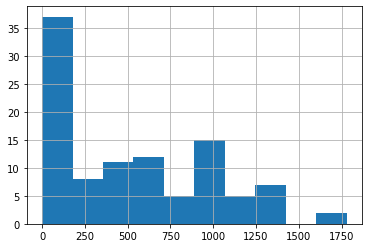

In [21]:
### Creating 4 plots of own choice

## 1. Histogram

asi_balance = c_data[c_data['Ethnicity'] == 'Asian']['Balance']
asi_balance.hist()

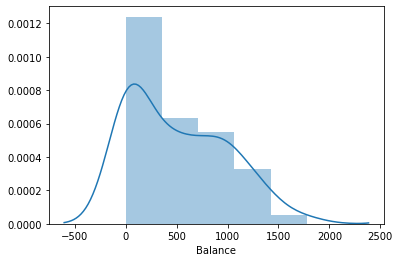

In [22]:
## 2. Distribution plot

sns.distplot(asi_balance)

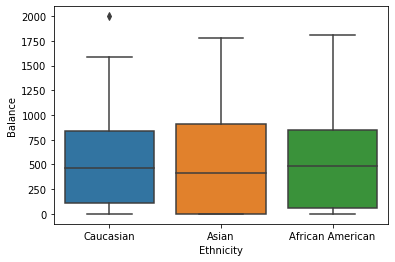

In [23]:
## 3. Boxplot

sns.boxplot(x = 'Ethnicity', y = 'Balance', data = c_data, orient = 'v')

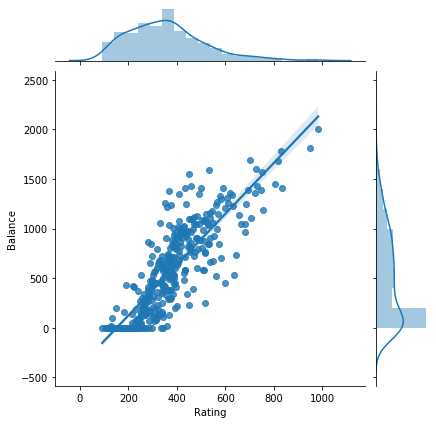

In [24]:
## 4. Jointplot, regression kind

sns.jointplot(x = 'Rating', y = 'Balance', data = c_data, kind ='reg')

### • Data understanding:
#### You need to focus on the column Balance, and try to understand what other variables have an impact on/are related to it. You are free to explore the data with any of the tools we used in the course, but include- 
#### (i) Some plots on the relationship between Balance and some other variables

In [25]:
### Some important operations: As we often have faced issues with the datatype of the 'Income' column during plotting below,
### It is important to transform datatype into float or integer.

c_data.dtypes ## checking datatype

Income       object
Limit         int64
Rating        int64
Cards         int64
Age           int64
Gender       object
Student      object
Married      object
Ethnicity    object
Balance       int64
dtype: object

In [26]:
c_copy = c_data.copy() ## Copying the main dataFrame

## Converting object-type 'Income' column to float-type data

c_copy['Income'] = c_copy['Income'].str.replace(',', '').astype(float)
c_copy.dtypes

Income       float64
Limit          int64
Rating         int64
Cards          int64
Age            int64
Gender        object
Student       object
Married       object
Ethnicity     object
Balance        int64
dtype: object

In [27]:
#### Now, the 'c_copy' dataFrame will be used for the following operations.

c_copy.tail(3)

,Income,Limit,Rating,Cards,Age,Gender,Student,Married,Ethnicity,Balance
397,57872.0,4171,321,5,67,Female,No,Yes,Caucasian,138
398,37728.0,2525,192,1,44,Male,No,Yes,Caucasian,0
399,18701.0,5524,415,5,64,Female,No,No,Asian,966


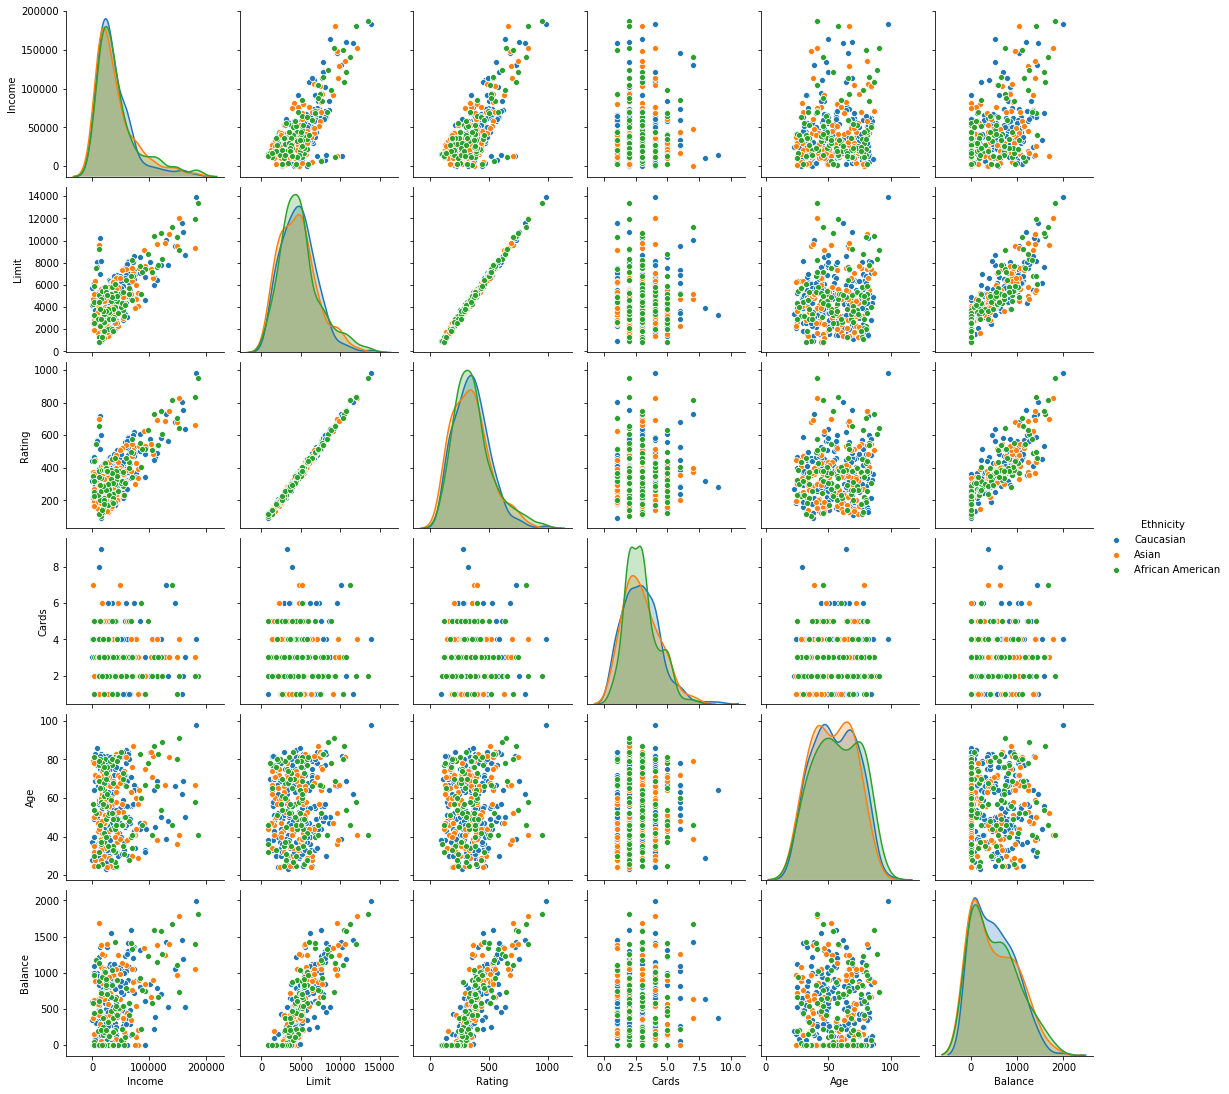

In [28]:
## Relationship between the numerical variables while checking if Ethnicity makes andy difference with Pairplot

sns.pairplot(c_copy, hue = 'Ethnicity')

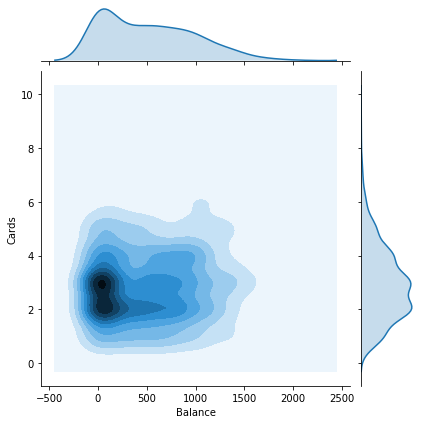

In [29]:
## Relationship between Balance and Cards with Jointplot, 'Kernel Density Estimate /kde' kind

sns.jointplot(c_copy.Balance, c_copy.Cards, kind = 'kde')

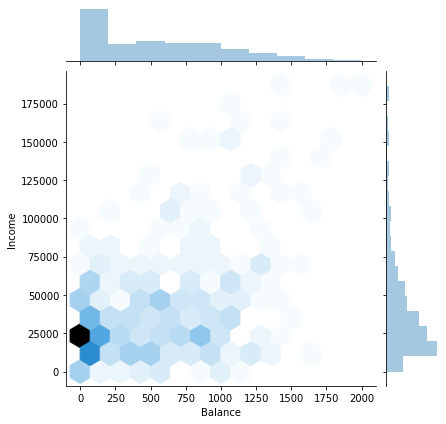

In [30]:
## Relationship between Balance and Income with Jointplot, Hexagon kind

sns.jointplot(c_copy.Balance, c_copy.Income, kind ='hex')

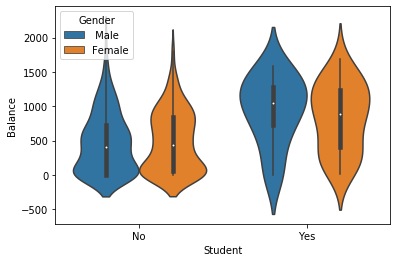

In [31]:
## Relationship between Balance and Student status while checking if Gender makes any difference with Violinplot

sns.violinplot(x = 'Student', y = 'Balance', data = c_copy, hue = 'Gender')

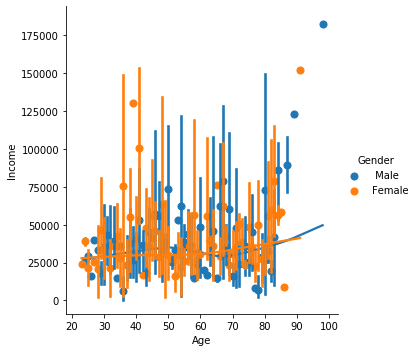

In [32]:
## Relationship between Age and Income while checking if Gender makes any difference with 'Linear Model/lm' plot

sns.lmplot('Age', 'Income', data = c_copy, hue = 'Gender', x_estimator = np.mean, lowess = True)

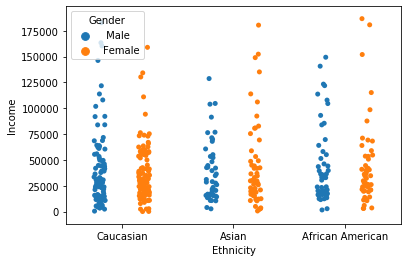

In [33]:
## Relationship between Ethnicity and Income while checking if Gender makes any differece with Stripplot 

sns.stripplot(x = 'Ethnicity', y = 'Income', data = c_copy, jitter = True, hue = 'Gender', dodge = True)

####  (ii) Calculate the correlation between Balance and other variables (when applicable). The output of this analysis should be a list of four variables that you identify to be related to Balance, with the choice of the variables justified using the results of your analysis.

In [34]:
### Calculating correlation between 'Balance' and other variables-

## As it is asked, a list of 04 variables are identified to be realted to the 'Balance' colcumn

c_copy.corrwith(c_copy['Balance'])[[0, 1, 2, 3, -1]]

Income     0.434014
Limit      0.861697
Rating     0.863625
Cards      0.086456
Balance    1.000000
dtype: float64

In [35]:
#### Optional (Another way of getting correlation). 
## However, here all the variables included.

c_copy.corr()

,Income,Limit,Rating,Cards,Age,Balance
Income,1.000000,0.708628,0.704926,-0.003452,0.120423,0.434014
Limit,0.708628,1.000000,0.996880,0.010231,0.100888,0.861697
Rating,0.704926,0.996880,1.000000,0.053239,0.103165,0.863625
Cards,-0.003452,0.010231,0.053239,1.000000,0.042948,0.086456
Age,0.120423,0.100888,0.103165,0.042948,1.000000,0.001835
Balance,0.434014,0.861697,0.863625,0.086456,0.001835,1.000000


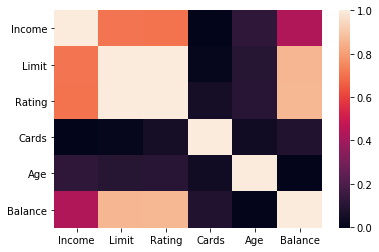

In [36]:
## Plotting correlation between variables with Heatmap

sns.heatmap(c_copy.corr())

### Answer to the Question No: 03

#### (Credit data)
                  Continuing...  

#### • Remove outliers: for each numeric column, remove the top 5% of values (0.95 quantile)

In [37]:
### Removing outliers: top 5% of values (0.95 quantile)

## Funcion for removing outliers-

def goons(x):   
    
    for col in x.columns:
        
 ## This checks whether the string 'float' is the sub-string of x[col].dtype as a string, same with 'int'.

        if (('float' in str(x[col].dtype)) | ('int' in str(x[col].dtype))): 
            
            outliers = x[col].quantile(0.95)
            x = x[x[col] < outliers]
            
        else:
            x[col] = x[col]
            
    return x

cln_df = goons(c_copy)
cln_df.shape

(266, 10)

#### • Create a categorical version of Cards column with two categories: (i) users with more than 3, and (ii) users with at most 3 cards.

In [38]:
### Creating a categorical version of Cards column with the given categories

cat_df = cln_df.copy()  ## Required function

def cat(a):
    if a > 3:
        return 'Too many'
    return 'Normal'

cat_df['Cards_Comments'] = cat_df['Cards'].apply(cat) ## Applying the fuction to make the 'Cards_Comments' categorical column
cat_df.sample(5)

,Income,Limit,Rating,Cards,Age,Gender,Student,Married,Ethnicity,Balance,Cards_Comments
386,19253.0,3683,287,4,57,Male,No,No,African American,371,Too many
249,22574.0,1551,134,3,43,Female,Yes,Yes,Caucasian,98,Normal
183,80861.0,4090,335,3,29,Female,No,Yes,Asian,0,Normal
280,53401.0,5319,377,3,35,Female,No,No,African American,541,Normal
392,25974.0,2308,196,2,24,Male,No,No,Asian,0,Normal


#### • Create a categorical version of Age with 4 categories. You may freely choose the intervals, but name the categories Very young, Young, Middle-aged and Elderly

In [39]:
## Creating a categorical version of 'Age' column 

cat_df1 = cat_df.copy()

bins = [0, 22, 33, 42, float('inf')] ## Creating the bins
group_titles = ['Very young', 'Young', 'Middle-aged', 'Elderly'] ## Creating the labels with the asked names

cat_df1['Age_Group'] = pd.cut(cat_df1['Age'], bins, labels = group_titles )
cat_df1.sample(5)

,Income,Limit,Rating,Cards,Age,Gender,Student,Married,Ethnicity,Balance,Cards_Comments,Age_Group
315,14479.0,3907,296,3,43,Male,No,Yes,Caucasian,463,Normal,Elderly
47,44646.0,4431,320,2,49,Male,Yes,Yes,Caucasian,797,Normal,Elderly
194,30406.0,2120,181,2,79,Male,No,Yes,African American,0,Normal,Elderly
80,27369.0,3449,288,3,40,Female,No,Yes,Caucasian,162,Normal,Middle-aged
110,34537.0,3271,250,3,57,Female,No,Yes,Asian,47,Normal,Elderly


#### • Scale the remaining numeric columns using the min-max transformation.

In [40]:
cdf_1 = cat_df1.copy()

nm = cdf_1.select_dtypes('number')  ## Checking the numeric columns
nm1 = nm.drop(['Cards', 'Age'], axis = 1)  ## Dropping the used columns

## Printing the remaining numeric columns

print('Followings are the remaining numeric columns of the DataFrame that left for scaling:-')

for col in nm1.columns:
    print(col)

Followings are the remaining numeric columns of the DataFrame that left for scaling:-
Income
Limit
Rating
Balance


In [41]:
#### Scaling Income, Limit, Rating and Balance columns using min-max transformation

#### In order to get all our variables on the same scale (typically between 0 and 1),
#### we will do the task in different cells.

cd = cdf_1.copy()

trans = MinMaxScaler() ## Variable for MinMaxScaler

## Fitting to the data to be used for later scaling
trans.fit(cd[['Income']]) 

## Tranforming data using the fitted scalar
a1 = trans.transform(cd[['Income']]) 

## Creating new columns in the DataFrame with the created new information
cd['Income_Scaled'] = a1   

In [42]:
trans.fit(cd[['Limit']])
a2 = trans.transform(cd[['Limit']])
cd['Limit_Scaled'] = a2

In [43]:
trans.fit(cd[['Rating']])
a3 = trans.transform(cd[['Rating']])
cd['Rating_Scaled'] = a3

In [44]:
trans.fit(cd[['Balance']])
a4 = trans.transform(cd[['Balance']])
cd['Balance_Scaled'] = a4
cd.sample(5)

,Income,Limit,Rating,Cards,Age,Gender,Student,Married,Ethnicity,Balance,Cards_Comments,Age_Group,Income_Scaled,Limit_Scaled,Rating_Scaled,Balance_Scaled
80,27369.0,3449,288,3,40,Female,No,Yes,Caucasian,162,Normal,Middle-aged,0.240480,0.412729,0.469880,0.153700
213,39422.0,5245,383,2,44,Male,No,No,African American,637,Normal,Elderly,0.346431,0.698488,0.698795,0.604364
317,68462.0,4712,340,2,71,Male,No,Yes,Caucasian,136,Normal,Elderly,0.601705,0.613683,0.595181,0.129032
130,23793.0,3821,281,4,56,Female,Yes,Yes,African American,868,Too many,Elderly,0.209045,0.471917,0.453012,0.823529
70,24889.0,3954,318,4,75,Male,No,Yes,Caucasian,357,Too many,Elderly,0.218680,0.493079,0.542169,0.338710


              Income  Income_Scaled
count     266.000000     266.000000
mean    31772.849624       0.279192
std     21145.661953       0.185880
min        12.000000       0.000000
25%     16574.500000       0.145592
50%     27359.000000       0.240392
75%     41503.750000       0.364731
max    113772.000000       1.000000


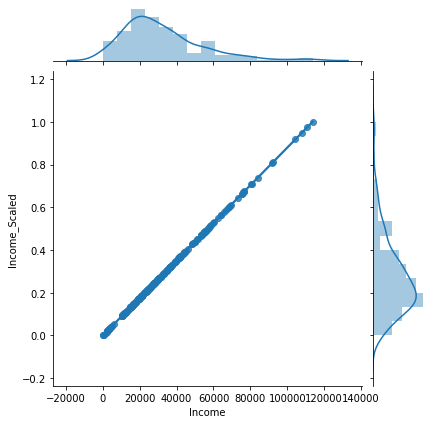

In [45]:
### (Optional), an Example item to do the comparison

print(cd[['Income', 'Income_Scaled']].describe())

sns.jointplot(x = 'Income', y = 'Income_Scaled', data = cd, kind ='reg')

#### • Create dummy variables (one-hot encoding) for all the categorical columns.

In [46]:
## Finding categorical columns in the dataset

c = cd.select_dtypes(include=['category', object])
c_additional = c.drop(['Cards_Comments', 'Age_Group'], axis = 1)  ## Dropping the previously added columns 

print('Followings are the Categorical columns of the DataFrame that we will create dummy variables for:-')

for column in c_additional.columns:
    print(column)

Followings are the Categorical columns of the DataFrame that we will create dummy variables for:-
Gender
Student
Married
Ethnicity


In [47]:
## Creating dummy variables for 'Gender', 'Student', 'Married' and 'Ethnicity' columns including one-hot encoding-

catCol = ['Gender', 'Student', 'Married', 'Ethnicity']

dummy = pd.get_dummies(cd, columns = catCol, drop_first = True)
dummy

,Income,Limit,Rating,Cards,Age,Balance,Cards_Comments,Age_Group,Income_Scaled,Limit_Scaled,Rating_Scaled,Balance_Scaled,Gender_Female,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian
0,14891.0,3606,283,2,34,333,Normal,Middle-aged,0.130793,0.437709,0.457831,0.315939,0,0,1,0,1
4,55882.0,4897,357,2,68,331,Normal,Elderly,0.491122,0.643119,0.636145,0.314042,0,0,1,0,1
6,20996.0,3388,259,2,37,203,Normal,Middle-aged,0.184459,0.403023,0.400000,0.192600,1,0,0,0,0
11,15045.0,1311,138,3,64,0,Normal,Elderly,0.132147,0.072554,0.108434,0.000000,0,0,0,0,1
12,80616.0,5308,394,1,57,204,Normal,Elderly,0.708544,0.708512,0.725301,0.193548,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,25974.0,2308,196,2,24,0,Normal,Young,0.228217,0.231185,0.248193,0.000000,0,0,0,1,0
393,17316.0,1335,138,2,65,0,Normal,Elderly,0.152110,0.076372,0.108434,0.000000,0,0,0,0,0
394,49794.0,5758,410,4,40,734,Too many,Middle-aged,0.437605,0.780111,0.763855,0.696395,0,0,0,0,1
395,12096.0,4100,307,3,32,560,Normal,Young,0.106224,0.516309,0.515663,0.531309,0,0,1,0,1
